## Softmax

In [2]:
import numpy as np

In [3]:
vector = np.array([11231, 999, 123142])

In [4]:
vector = np.array([-10, 10, 24])

In [5]:
def softmax(vec):
    vec -= np.max(vec)
    exp = np.exp(vec)
    return exp / np.sum(exp)

In [6]:
softmax(vector)

array([1.71390701e-15, 8.31528028e-07, 9.99999168e-01])

## Assignment-04 基于维基百科的词向量构建

在本章，你将使用Gensim和维基百科获得你的第一批词向量，并且感受词向量的基本过程。

![](https://www.kaggleusercontent.com/kf/1018109/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..JNNggcCCDcYEypvp7ZDwOA.cM9CuDpuCKo0K_ZkMFLAUvhfip0P6SRZ4LddwgTtgwz8pQy1dZeGVJWi6u81KSpAFNSi7YximVVJbPw8xsFySdWlqoUwvSER-LLIRfmlpsCvtDt90NaLYT2FHlwl0tfF-1MKtiFsWlGQ8LGo40hL3ccBSwMZy214kGJf9bNkW_g.kZbF5sgN5qha3zhjilfSDg/__results___files/__results___9_0.png)

## Step-01: Download Wikipedia Chinese Corpus: https://dumps.wikimedia.org/zhwiki/20190720/

第一步：使用维基百科下载中文语料库

## Step-02: Using https://github.com/attardi/wikiextractor to extract the wikipedia corpus

第二步：使用python wikipedia extractor抽取维基百科的内容

In [ ]:
python WikiExtractor.py -b 1024M -o extracted zhwiki-20190720-pages-articles.xml.bz2

## Step-03: Using gensim get word vectors: 

Reference: 

+ https://radimrehurek.com/gensim/models/word2vec.html
+ https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第三步：参考Gensim的文档和Kaggle的参考文档，获得词向量。 注意，你要使用Jieba分词把维基百科的内容切分成一个一个单词，然后存进新的文件中。然后，你需要用Gensim的LineSentence这个类进行文件的读取。

在训练成词向量Model.

In [77]:
# cleaning
import re
import sys
import codecs
def filte(input_file):
    p1 = re.compile('（）')
    p2 = re.compile('《》')
    p3 = re.compile('「')
    p4 = re.compile('」')
    p5 = re.compile('<doc (.*)>')
    p6 = re.compile('</doc>')
    p7 = re.compile('\d+')
    outfile = codecs.open('new_' + input_file, 'w', 'utf-8')
    with codecs.open(input_file, 'r', 'utf-8') as myfile:
        for line in myfile:
            line = p1.sub('', line)
            line = p2.sub('', line)
            line = p3.sub('', line)
            line = p4.sub('', line)
            line = p5.sub('', line)
            line = p6.sub('', line)
            line = p7.sub('', line)
            outfile.write(line)
    outfile.close()
    
filte("wiki_01")
# 原文链接：https://blog.csdn.net/wangyangzhizhou/article/details/78348949


In [ ]:
from zhtools.langconv import *

def Traditional2Simplified(sentence):
    '''
    将sentence中的繁体字转为简体字
    :param sentence: 待转换的句子
    :return: 将句子中繁体字转换为简体字之后的句子
    '''
    sentence = Converter('zh-hans').convert(sentence)
    return sentence

# 原文链接：https://blog.csdn.net/u012052268/article/details/77823970

In [80]:
import jieba
import re
import logging
import os
import sys
import multiprocessing

# 分词
fileneedCut='new_wiki_01'
filename='cut_wiki_01'

fn=open(fileneedCut,"r",encoding="utf-8")
f=open(filename,"w+",encoding="utf-8")
for line in fn.readlines():
    simplified = Traditional2Simplified(line)
    words=jieba.cut(simplified)
    for w in words:
       f.write(str(w) + " ")
f.close()
fn.close()
# reference
# https://blog.csdn.net/wangyangzhizhou/article/details/78348949

In [73]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

filename = "cut_wiki_01"
outp1 = "model"
outp2 = "format"
model = Word2Vec(LineSentence(filename), size=10, window=5, min_count=1000,
                     workers=multiprocessing.cpu_count())

# LineSentence(inp)：
# 应该是把word2vec训练模型的磁盘存储文件（model在内存中总是不踏实）转换成所需要的格式；对应的格式是参考上面的例1。 
# size：是每个词的向量维度； 
# window：是词向量训练时的上下文扫描窗口大小，窗口为5就是考虑前5个词和后5个词； 
# min-count：设置最低频率，默认是5，如果一个词语在文档中出现的次数小于5，那么就会丢弃； 
# workers：是训练的进程数（需要更精准的解释，请指正），默认是当前运行机器的处理器核数。这些参数先记住就可以了。



# 原文链接：https://blog.csdn.net/Jerr__y/article/details/52967351

/Users/jiechu/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


## Step-04: Using some words to test your preformance. 

第四步，测试同义词，找几个单词。

In [71]:
model.most_similar("辍学")

/Users/jiechu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


KeyError: "word '辍学' not in vocabulary"

## Step-05: Using visualization tools: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第五步：使用Kaggle给出的T-SEN进行词向量的可视化。

/Users/jiechu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


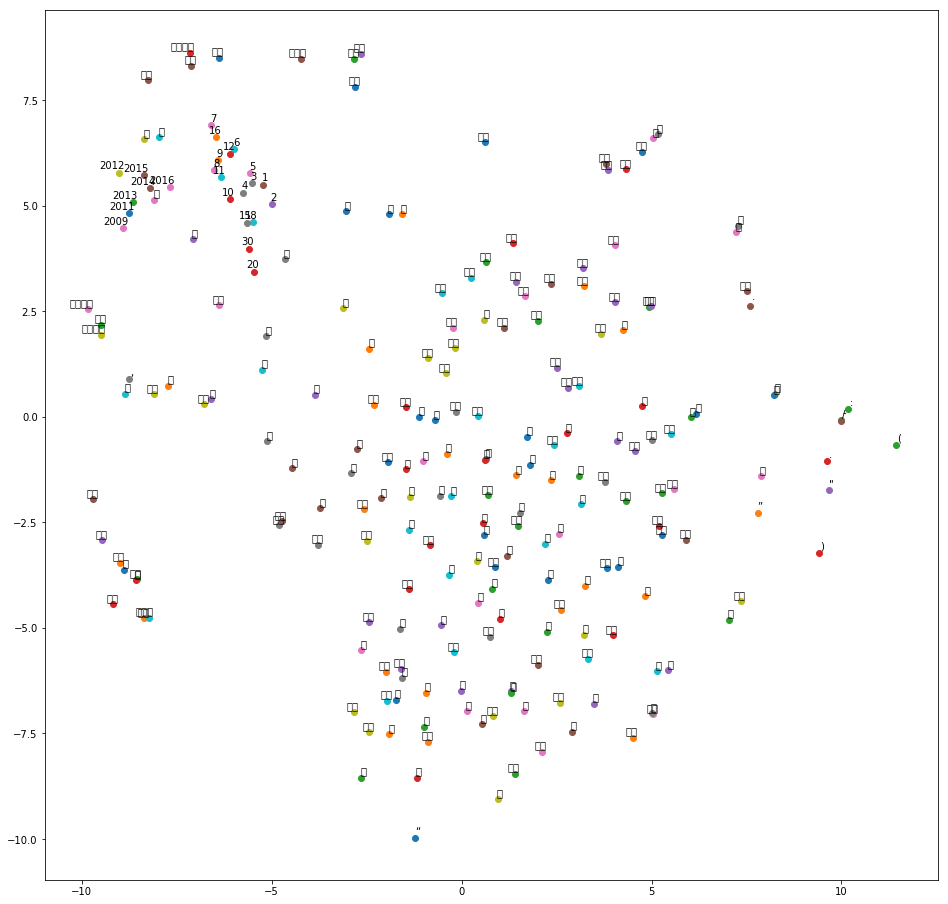

In [79]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline


def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
tsne_plot(model)

